In [1]:
# imports
import numpy as np
import pandas as pd
import requests as re
import os
import json
from pandas.io.json import json_normalize  
import sqlite3
from sqlite3 import Error
# from getpass import getpass
# from dotenv import load_dotenv

In [2]:
import json
from pandas.io.json import json_normalize  

In [49]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\silvh\AppData\Local\Temp\ipykernel_9936\364958460.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
yelpEP = 'https://api.yelp.com/v3/businesses/search'
# origin = '49.273085,-123.100375' # Coordinates for Main Street Station
origin = '49.283335,-123.116417' # Coordinates for Granville Station


# Examples from Postman:
# Yelp: https://api.yelp.com/v3/businesses/search?latitude=49.273085&longitude=-123.100375&term=coworking
# Custom function
def get_venues(coordinates,urlEP='https://api.foursquare.com/v3/places/search',category='11128',radius=10000):
    """Parameters:
    - Coordinates: (string) Latitude and longitude, separated by a comma.
    - Term: (string, optional) Search term to use. Default is 'coworking'.
    - urlEP: (string, optional) Root for API endpoint URL. Default for Foursquare Places.
    - Category: (string, optional) Category of place. If blank default is 11128 
    for 'Business and Professional Services > Office > Coworking Space'
        - 13003 for 'Dining and Drinking > Bar'. 
    - Radius: (integer, optional) Radius of search results.
    
    Returns:
    - URL for API call (string)
    """
    urlEP=str(urlEP)
    radius = int(radius)
    category=str(category)

    if urlEP.find('api.yelp') > 0:
        coordinates = str.split(coordinates,sep=',')
        urlAppend = f'?latitude={coordinates[0]}&longitude={coordinates[1]}&radius={radius}&term={category}' # yelp
    else:
        urlAppend = f'?ll={coordinates}&radius={radius}&categories={category}' # Default is for foursquare
    request_URL=urlEP+urlAppend
    
    return request_URL

requestURL_4squarePlaces = get_venues(origin)
requestURL_yelp = get_venues(origin,yelpEP,category='coworking')
print(requestURL_4squarePlaces)
print(requestURL_yelp)

https://api.foursquare.com/v3/places/search?ll=49.283335,-123.116417&radius=10000&categories=11128
https://api.yelp.com/v3/businesses/search?latitude=49.283335&longitude=-123.116417&radius=10000&term=coworking


In [5]:
#set the keys
key4square = os.environ["API_FOURSQUARE"]
keyYelp = os.environ['API_Yelp']

# Test that the keys work
# print(key4square)
# print(keyYelp)

# Foursquare

Send a request to Foursquare with a small radius (1000m) with the location of your choice

In [6]:

# Four square GET request
header_4square = {"Accept": "application/JSON"}
header_4square['Authorization'] = key4square
print(header_4square)
response4squarePlaces = re.get(requestURL_4squarePlaces, headers=header_4square) ## API request
# print(response4squarePlaces.json())

{'Accept': 'application/JSON', 'Authorization': 'fsq3f2XsuYKnioaDoty53EOHDgCyE22ecgw6D/HW/02QWCs='}


In [7]:
# Turn GET request to JSON data: Four Square
json4squarePlaces = response4squarePlaces.json()
foursquare = pd.DataFrame(json4squarePlaces['results'])
foursquare.head(3)

,fsq_id,categories,chains,distance,geocodes,link,location,name,related_places,timezone
0,4cbdb4d59552b60c758aec8b,"[{'id': 11128, 'name': 'Coworking Space', 'ico...",[],93,"{'main': {'latitude': 49.282736, 'longitude': ...",/v3/places/4cbdb4d59552b60c758aec8b,"{'address': '555 Seymour St', 'country': 'CA',...",BC Campus,{},America/Vancouver
1,4d0fba4bc3dc37045a663474,"[{'id': 11128, 'name': 'Coworking Space', 'ico...",[],270,"{'main': {'latitude': 49.281157, 'longitude': ...",/v3/places/4d0fba4bc3dc37045a663474,"{'address': '401 Georgia St W', 'country': 'CA...",401 West Georgia,{'children': [{'fsq_id': '62c712d232c44b48aef6...,America/Vancouver
2,4ffc942de4b0990d47bb425d,"[{'id': 11128, 'name': 'Coworking Space', 'ico...",[],280,"{'main': {'latitude': 49.284754, 'longitude': ...",/v3/places/4ffc942de4b0990d47bb425d,"{'address': '602 Hastings St W', 'address_exte...",Collaborative Open Space Vancouver,{},America/Vancouver


Parse through the response to get the POI details you want (rating, name, location, etc)

In [8]:
foursquare.columns
print(foursquare.shape)

(10, 10)


Put your parsed results into a DataFrame

In [8]:
# use a function from Pandas json_normalize()

dfFoursquare = json_normalize(json4squarePlaces, record_path='results')
# print(dfFoursquare.columns)
dfFoursquare.head(3)

C:\Users\silvh\AppData\Local\Temp\ipykernel_9936\954782581.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dfFoursquare = json_normalize(json4squarePlaces, record_path='results')


,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,location.address,...,location.locality,location.region,geocodes.roof.latitude,geocodes.roof.longitude,location.postcode,related_places.children,location.address_extended,related_places.parent.fsq_id,related_places.parent.name,location.neighborhood
0,4cbdb4d59552b60c758aec8b,"[{'id': 11128, 'name': 'Coworking Space', 'ico...",[],93,/v3/places/4cbdb4d59552b60c758aec8b,BC Campus,America/Vancouver,49.282736,-123.115513,555 Seymour St,...,Vancouver,BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4d0fba4bc3dc37045a663474,"[{'id': 11128, 'name': 'Coworking Space', 'ico...",[],270,/v3/places/4d0fba4bc3dc37045a663474,401 West Georgia,America/Vancouver,49.281157,-123.115053,401 Georgia St W,...,Vancouver,BC,49.281157,-123.115053,V6B 5A1,"[{'fsq_id': '62c712d232c44b48aef66fe4', 'name'...",NaN,NaN,NaN,NaN
2,4ffc942de4b0990d47bb425d,"[{'id': 11128, 'name': 'Coworking Space', 'ico...",[],280,/v3/places/4ffc942de4b0990d47bb425d,Collaborative Open Space Vancouver,America/Vancouver,49.284754,-123.113251,602 Hastings St W,...,Vancouver,BC,49.284754,-123.113251,V6B 1P2,NaN,# 728,NaN,NaN,NaN


In [116]:
# this is the list of Foursquare categories in the results
json_normalize(json4squarePlaces['results'], record_path='categories')

C:\Users\silvh\AppData\Local\Temp\ipykernel_16800\389920604.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(json4squarePlaces['results'], record_path='categories')


,id,name,icon.prefix,icon.suffix
0,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
1,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
2,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
3,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
4,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
5,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
6,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
7,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
8,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png
9,11128,Coworking Space,https://ss3.4sqi.net/img/categories_v2/buildin...,.png


In [ ]:
# This time, create GET request with ratings parameter included
# Examples from Postman:
# Yelp: https://api.yelp.com/v3/businesses/search?latitude=49.273085&longitude=-123.100375&term=coworking
# Custom function
def get_venuesRated(coordinates,urlEP='https://api.foursquare.com/v3/places/search',category='11128',radius=10000):
    """Parameters:
    - Coordinates: (string) Latitude and longitude, separated by a comma.
    - Term: (string, optional) Search term to use. Default is 'coworking'.
    - urlEP: (string, optional) Root for API endpoint URL. Default for Foursquare Places.
    - Category: (string, optional) Category of place. If blank default is 11128 
    for 'Business and Professional Services > Office > Coworking Space'
        - 13003 for 'Dining and Drinking > Bar'. 
    - Radius: (integer, optional) Radius of search results.
    
    Returns:
    - URL for API call (string)
    """
    urlEP=str(urlEP)
    radius = int(radius)
    category=str(category)

    if urlEP.find('api.yelp') > 0:
        coordinates = str.split(coordinates,sep=',')
        urlAppend = f'?latitude={coordinates[0]}&longitude={coordinates[1]}&radius={radius}&term={category}' # yelp
    else:
        urlAppend = f'?ll={coordinates}&radius={radius}&categories={category}&fields=rating' # Default is for foursquare
    request_URL=urlEP+urlAppend
    
    return request_URL

requestURL_4squarePlaces2 = get_venuesRated(origin)
print(requestURL_4squarePlaces2)

https://api.foursquare.com/v3/places/search?ll=49.283335,-123.116417&radius=10000&categories=11128&fields=rating
https://api.yelp.com/v3/businesses/request?latitude=49.283335&longitude=-123.116417&radius=10000&term=coworking


In [119]:
# This time with ratings included
# Four square GET request
header_4square = {"Accept": "application/JSON"}
header_4square['Authorization'] = key4square
print(header_4square)
response4squarePlaces2 = re.get(requestURL_4squarePlaces, headers=header_4square) ## API request
print(response4squarePlaces2.json())

{'Accept': 'application/JSON', 'Authorization': 'fsq3f2XsuYKnioaDoty53EOHDgCyE22ecgw6D/HW/02QWCs='}
{'results': [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}], 'context': {'geo_bounds': {'circle': {'center': {'latitude': 49.283335, 'longitude': -123.116417}, 'radius': 10000}}}}


In [ ]:
## The GET request resulted in empty results 

# Yelp

Send a request with the same location paramaters (location, radius, etc)

In [39]:
# Yelp GET request
headerYelp = {"Accept": "application/JSON"}
headerYelp['Authorization'] = 'BEARER '+keyYelp
# print(headerYelp)
responseYelp = re.get(requestURL_yelp, headers=headerYelp) ## API request
responseYelp.status_code


200

In [40]:
# Turn GET request to JSON data: Yelp
jsonYelp = responseYelp.json()
# jsonYelp

Parse through your result and get POI details

In [26]:
print(yelp.shape)
print(yelp.columns)

(20, 15)
Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance'],
      dtype='object')


Put your parsed results into a DataFrame

In [41]:
dfYelp = json_normalize(jsonYelp,record_path='businesses')
dfYelp.head(3)

C:\Users\silvh\AppData\Local\Temp\ipykernel_9936\4048724908.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dfYelp = json_normalize(jsonYelp,record_path='businesses')


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,JeUBI8BdKPlzgkeq8Pn1vg,l-atelier-vancouver-vancouver-4,L'Atelier Vancouver,https://s3-media1.fl.yelpcdn.com/bphoto/dB3Hky...,False,https://www.yelp.com/biz/l-atelier-vancouver-v...,3,"[{'alias': 'sharedofficespaces', 'title': 'Sha...",5.0,[],...,49.283220,-123.110080,319 W Hastings Street,,,Vancouver,V6B 1H6,CA,BC,"[319 W Hastings Street, Vancouver, BC V6B 1H6,..."
1,7i-PXkf-vxBGcWGKagQOYg,the-profile-vancouver-2,The Profile,https://s3-media3.fl.yelpcdn.com/bphoto/8O17t4...,False,https://www.yelp.com/biz/the-profile-vancouver...,4,"[{'alias': 'sharedofficespaces', 'title': 'Sha...",3.0,[],...,49.283837,-123.105446,55 Water Street,Suite 408,,Vancouver,V6B 1A1,CA,BC,"[55 Water Street, Suite 408, Vancouver, BC V6B..."
2,7iVmZWviiyRZC-5sIXdrQw,telus-garden-vancouver,TELUS Garden,https://s3-media1.fl.yelpcdn.com/bphoto/vLTrac...,False,https://www.yelp.com/biz/telus-garden-vancouve...,2,"[{'alias': 'apartments', 'title': 'Apartments'...",4.0,[],...,49.280450,-123.118040,777 Richards Street,,,Vancouver,V6B 0M3,CA,BC,"[777 Richards Street, Vancouver, BC V6B 0M3, C..."


# Google (stretch)

Use the same process as the first two APIs

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [9]:
# Desired columns from Four Square:
columns4square = (
       'fsq_id', 'distance', 'link', 'name', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'location.address'
       )

dfFoursquare1 = dfFoursquare.loc[:,columns4square]
dfFoursquare1.head(2)

,fsq_id,distance,link,name,geocodes.main.latitude,geocodes.main.longitude,location.address
0,4cbdb4d59552b60c758aec8b,93,/v3/places/4cbdb4d59552b60c758aec8b,BC Campus,49.282736,-123.115513,555 Seymour St
1,4d0fba4bc3dc37045a663474,270,/v3/places/4d0fba4bc3dc37045a663474,401 West Georgia,49.281157,-123.115053,401 Georgia St W


In [10]:
# Remove periods from column names
dfFoursquare1.columns = dfFoursquare1.columns.str.replace('.','_')
dfFoursquare1.head(1)

C:\Users\silvh\AppData\Local\Temp\ipykernel_9936\120036872.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfFoursquare1.columns = dfFoursquare1.columns.str.replace('.','_')


,fsq_id,distance,link,name,geocodes_main_latitude,geocodes_main_longitude,location_address
0,4cbdb4d59552b60c758aec8b,93,/v3/places/4cbdb4d59552b60c758aec8b,BC Campus,49.282736,-123.115513,555 Seymour St


In [99]:
# Generate SQL script to make table: Four Square

    # tableName_foursquare = 'coworking4square'
    # sql_column_code = f'CREATE TABLE IF NOT EXISTS {tableName_foursquare} ('

    # for column in columns4square:
    #     column = column.replace('.','_')
    #     sql_column_code += create_sql_table_columns(column)
    #     print(create_sql_table_columns(column))
    #     if column == columns4square[-1].replace('.','_'):
    #         sql_column_code += ')'
    #     else:
    #         sql_column_code += ", "

fsq_id text
distance text
link text
name text
geocodes_main_latitude text
geocodes_main_longitude text
location_address text


'CREATE TABLE IF NOT EXISTS coworking4square (fsq_id text, distance text, link text, name text, geocodes_main_latitude text, geocodes_main_longitude text, location_address text)'

In [42]:
# Desired columns from Yelp:
columnsYelp = (
       'id','name','review_count', 'rating', 'distance', 'coordinates.latitude', 
       'coordinates.longitude', 'location.address1')
dfYelp1 = dfYelp.loc[:,columnsYelp]
dfYelp1.head(2)

,id,name,review_count,rating,distance,coordinates.latitude,coordinates.longitude,location.address1
0,JeUBI8BdKPlzgkeq8Pn1vg,L'Atelier Vancouver,3,5.0,462.234321,49.283220,-123.110080,319 W Hastings Street
1,7i-PXkf-vxBGcWGKagQOYg,The Profile,4,3.0,797.689461,49.283837,-123.105446,55 Water Street


In [43]:
# remove periods from columnnames
dfYelp1.columns = dfYelp1.columns.str.replace('.','_')

C:\Users\silvh\AppData\Local\Temp\ipykernel_9936\1157004560.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfYelp1.columns = dfYelp1.columns.str.replace('.','_')


In [193]:
dfYelp1.columns

Index(['id', 'name', 'review_count', 'rating', 'distance',
       'coordinates_latitude', 'coordinates_longitude', 'location_address1'],
      dtype='object')

In [12]:
# Generate SQL script to make table
# Create a function

def sql_table_code(tableName,tableColumns):
    """Generate the SQL code to create a table: 
    Params:
    - tableName (string): Enter the name of the table to be created in the database.
    - tableColumns: A list/tuple of the columns to be created
    """
    sql_column_code = f'CREATE TABLE {tableName} ('
    for column in tableColumns:
        column = column.replace('.','_')
        sql_column_code += f'{column} text'
        if column == tableColumns[-1].replace('.','_'):
            sql_column_code += ')'
        else:
            sql_column_code += ", "
    return sql_column_code

sql_table_codeYelp = sql_table_code('coworkingYelp',columnsYelp)
sql_table_code4Square = sql_table_code('coworkin4square',columns4square)
sql_table_code4Square

'CREATE TABLE coworkin4square (fsq_id text, distance text, link text, name text, geocodes_main_latitude text, geocodes_main_longitude text, location_address text)'

In [30]:
# The following script creates a connection to the SQLite database. This function not necessary.
def create_connection(path):
    connection = None
    try: # Uses .connect() from the sqlite3 module and takes the SQLite database path as a parameter
        connection = sqlite3.connect(path) # 
        print("Connection to SQLite DB successful")
    except Error as e: # catches any exception that might be thrown if .connect() fails to establish a connection.
        print(f"The error '{e}' occurred")

    return connection

# Create connection object 
connection = create_connection("coworking.sqlite") # filename can be anything, just keep extension

c = connection.cursor()

Connection to SQLite DB successful


In [35]:

c.execute(sql_table_code4Square)

In [44]:
dfFoursquare1.to_sql('coworkin4square', connection, if_exists='replace', index = False)
# dfFoursquare1.to_sql('coworkin4square', 'coworking.db', if_exists='replace', index = False)

10

In [37]:
# Make sure that SQL table can be retrieved
resultsLimit = 4
pd.read_sql_query(f'SELECT * FROM coworkin4square LIMIT {resultsLimit}', connection)

,fsq_id,distance,link,name,geocodes_main_latitude,geocodes_main_longitude,location_address
0,4cbdb4d59552b60c758aec8b,93,/v3/places/4cbdb4d59552b60c758aec8b,BC Campus,49.282736,-123.115513,555 Seymour St
1,4d0fba4bc3dc37045a663474,270,/v3/places/4d0fba4bc3dc37045a663474,401 West Georgia,49.281157,-123.115053,401 Georgia St W
2,4ffc942de4b0990d47bb425d,280,/v3/places/4ffc942de4b0990d47bb425d,Collaborative Open Space Vancouver,49.284754,-123.113251,602 Hastings St W
3,4c2da9441683b713e66726ec,337,/v3/places/4c2da9441683b713e66726ec,The Network Hub,49.283982,-123.111870,422 Richards St


----


In [172]:
# Generate SQL script to make table, but adjust function to remove periods without replacement.

# def sql_table_code(tableName,tableColumns):
#     """Generate the SQL code to create a table: 
#     Params:
#     - tableName (string): Enter the name of the table to be created in the database.
#     - tableColumns: A list/tuple of the columns to be created
#     """
#     sql_column_code = f'CREATE TABLE {tableName} ('
#     for column in tableColumns:
#         column = column.replace('.','')
#         sql_column_code += f'{column} text'
#         if column == tableColumns[-1].replace('.',''):
#             sql_column_code += ')'
#         else:
#             sql_column_code += ", "
#     return sql_column_code

# sql_table_codeYelp = sql_table_code('coworkingYelp2',columnsYelp)
# sql_table_code4Square = sql_table_code('coworkin4square2',columns4square)
# sql_table_code4Square

'CREATE TABLE coworkin4square2 (fsq_id text, distance text, link text, name text, geocodesmainlatitude text, geocodesmainlongitude text, locationaddress text)'

In [45]:
# Create SQL table for Yelp coworking results
dfYelp1.to_sql('coworkingYelp3', connection, if_exists='replace', index = False)

20

In [32]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [34]:
# Delete old tables
query = 'DROP TABLE coworkin4square'
execute_query(connection, query)

The error 'no such table: coworkin4square' occurred


In [46]:
# Make sure that SQL table can be retrieved
resultsLimit = 3
pd.read_sql_query(f'SELECT * FROM coworkingYelp3 LIMIT {resultsLimit}', connection)

,id,name,review_count,rating,distance,coordinates_latitude,coordinates_longitude,location_address1
0,JeUBI8BdKPlzgkeq8Pn1vg,L'Atelier Vancouver,3,5.0,462.234321,49.283220,-123.110080,319 W Hastings Street
1,7i-PXkf-vxBGcWGKagQOYg,The Profile,4,3.0,797.689461,49.283837,-123.105446,55 Water Street
2,7iVmZWviiyRZC-5sIXdrQw,TELUS Garden,2,4.0,313.470364,49.280450,-123.118040,777 Richards Street


In [215]:
# See how feasible it is to combine data from both APIs.
# These are the dataframes to work with:
    # dfFoursquare1
    # dfYelp1

dfYelp1.loc[:,('name','location_address1')].merge(dfFoursquare1.loc[:,('name','location_address')],how='outer',left_on='location_address1',right_on='location_address').sort_values(by='name_x')

# Not looking good 

,name_x,location_address1,name_y,location_address
6,Central Park Business Centre,3665 Kingsway,NaN,NaN
11,Guinness Business Centre,1055 Hastings Street W,NaN,NaN
13,Hervana,595 Howe Street,NaN,NaN
4,HiVE Vancouver,210-128 W Hastings Street,NaN,NaN
7,Jameson Offices,838 W Hastings Street,NaN,NaN
0,L'Atelier Vancouver,319 W Hastings Street,NaN,NaN
12,MPS Executive Suites,999 Broadway W,NaN,NaN
17,Makeshift Work Space,308 - 877 E Hastings Street,NaN,NaN
19,Nelson Square,808 Nelson Street,NaN,NaN
5,Offices In the Marine Building,355 Burrard Street,NaN,NaN


In [218]:
# See how feasible it is to combine data from both APIs using latitude and longtitude
# These are the dataframes to work with:
    # dfFoursquare1
    # dfYelp1

dfYelp1.loc[:,('name','coordinates_latitude','coordinates_longitude')].merge(dfFoursquare1.loc[:,('name','geocodes_main_latitude','geocodes_main_longitude')],how='outer',left_on='coordinates_latitude',right_on='geocodes_main_latitude').sort_values(by='name_x')

# Not looking good 

,name_x,coordinates_latitude,coordinates_longitude,name_y,geocodes_main_latitude,geocodes_main_longitude
6,Central Park Business Centre,49.232670,-123.024200,NaN,NaN,NaN
11,Guinness Business Centre,49.287760,-123.118330,NaN,NaN,NaN
13,Hervana,49.284531,-123.117506,NaN,NaN,NaN
4,HiVE Vancouver,49.282105,-123.107792,NaN,NaN,NaN
7,Jameson Offices,49.286186,-123.115517,NaN,NaN,NaN
0,L'Atelier Vancouver,49.283220,-123.110080,NaN,NaN,NaN
12,MPS Executive Suites,49.263651,-123.126162,NaN,NaN,NaN
17,Makeshift Work Space,49.281249,-123.085438,NaN,NaN,NaN
19,Nelson Square,49.280040,-123.124910,NaN,NaN,NaN
5,Offices In the Marine Building,49.287360,-123.117129,NaN,NaN,NaN


In [28]:
# Create the SQL schema
connection.close()

*Now I will grab detailed business content for the venues found in yelp*

In [ ]:
# yelpEP = 'https://api.yelp.com/v3/businesses/search'
# # origin = '49.273085,-123.100375' # Coordinates for Main Street Station
# origin = '49.283335,-123.116417' # Coordinates for Granville Station


# # Examples from Postman:
# # Yelp: https://api.yelp.com/v3/businesses/search?latitude=49.273085&longitude=-123.100375&term=coworking
# # Custom function
# def get_venues(coordinates,urlEP='https://api.foursquare.com/v3/places/search',category='11128',radius=10000):
#     """Parameters:
#     - Coordinates: (string) Latitude and longitude, separated by a comma.
#     - Term: (string, optional) Search term to use. Default is 'coworking'.
#     - urlEP: (string, optional) Root for API endpoint URL. Default for Foursquare Places.
#     - Category: (string, optional) Category of place. If blank default is 11128 
#     for 'Business and Professional Services > Office > Coworking Space'
#         - 13003 for 'Dining and Drinking > Bar'. 
#     - Radius: (integer, optional) Radius of search results.
    
#     Returns:
#     - URL for API call (string)
#     """
#     urlEP=str(urlEP)
#     radius = int(radius)
#     category=str(category)

#     if urlEP.find('api.yelp') > 0:
#         coordinates = str.split(coordinates,sep=',')
#         urlAppend = f'?latitude={coordinates[0]}&longitude={coordinates[1]}&radius={radius}&term={category}' # yelp
#     else:
#         urlAppend = f'?ll={coordinates}&radius={radius}&categories={category}' # Default is for foursquare
#     request_URL=urlEP+urlAppend
    
#     return request_URL

# requestURL_4squarePlaces = get_venues(origin)
# requestURL_yelp = get_venues(origin,yelpEP,category='coworking')
# print(requestURL_4squarePlaces)
# print(requestURL_yelp)

Get the top 10 restaurants according to their rating

In [69]:
dfYelp1.head(3)

,id,name,review_count,rating,distance,coordinates_latitude,coordinates_longitude,location_address1
0,JeUBI8BdKPlzgkeq8Pn1vg,L'Atelier Vancouver,3,5.0,462.234321,49.283220,-123.110080,319 W Hastings Street
1,7i-PXkf-vxBGcWGKagQOYg,The Profile,4,3.0,797.689461,49.283837,-123.105446,55 Water Street
2,7iVmZWviiyRZC-5sIXdrQw,TELUS Garden,2,4.0,313.470364,49.280450,-123.118040,777 Richards Street


In [71]:

xYelp = dfYelp1['review_count'].astype(float)
yYelp = dfYelp1['rating'].astype(float64)



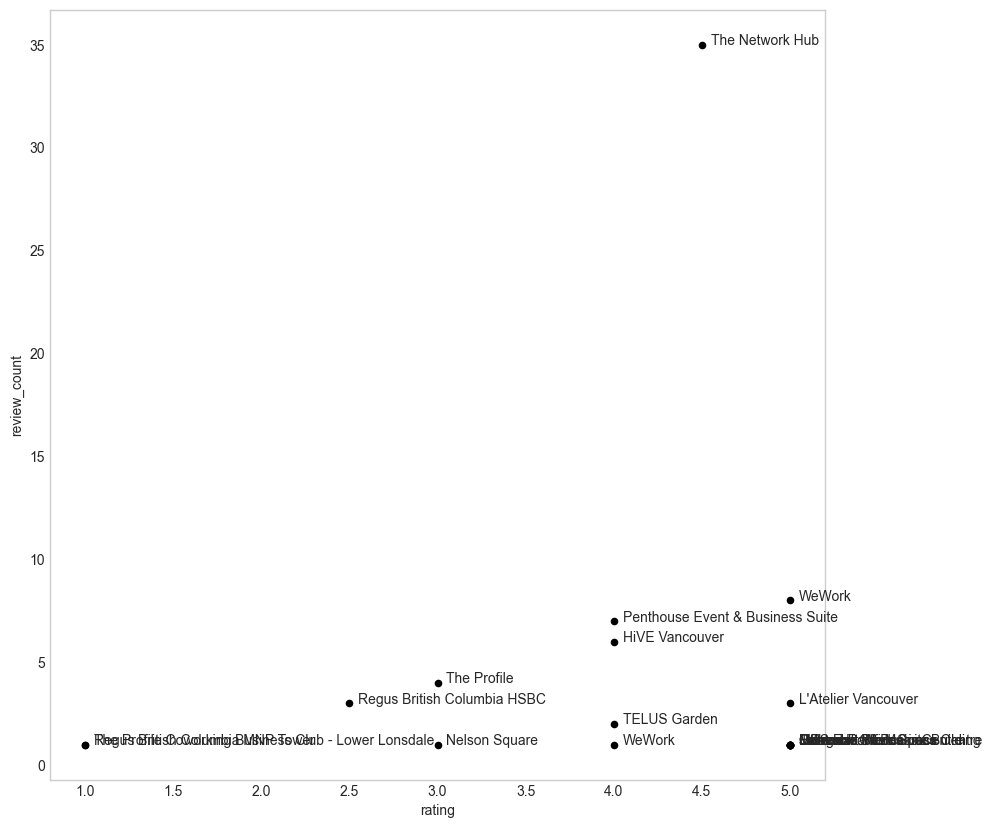

In [87]:
# Create a plot: 
# https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
# https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
scatterPlot = dfYelp1.plot.scatter('rating','review_count',c='black',grid=False,figsize=(10,10))

# Annotate each data point
for i, txt in enumerate(dfYelp1.name):
   scatterPlot.annotate(txt, (dfYelp1.rating.iat[i]+0.05, dfYelp1.review_count.iat[i]))

plt.show()

In [90]:
# Based on the above plot, we can create these thresholds to select the top coworking spaces:
# rating >3.5
# review_count >= 5
# These are the records that pass this filter:
filterTopSpaces = (dfYelp1['rating'] > 3.5) & (dfYelp1['review_count'] >= 5)
dfYelp1[filterTopSpaces]

,id,name,review_count,rating,distance,coordinates_latitude,coordinates_longitude,location_address1
3,mpESKGpsgGMzeXP0wmOB0w,The Network Hub,35,4.5,318.503564,49.283692,-123.112060,422 Richards Street
4,oGigV7Ad6UTUjkYQcuCZ0g,HiVE Vancouver,6,4.0,640.393096,49.282105,-123.107792,210-128 W Hastings Street
8,DwO0tlgrmibhgOQCklR5nA,Penthouse Event & Business Suite,7,4.0,1916.717858,49.272442,-123.095711,333 Terminal Avenue
9,Nn1RVmYpuO2M8Yw_JNaefA,WeWork,8,5.0,402.950903,49.286219,-123.119780,595 Burrard Street


# Travelling Salesman Problem (stretch)

If you have time, follow the steps in the [ortools tutorial](https://developers.google.com/optimization/routing/tsp) using Google's [Directions API](https://developers.google.com/maps/documentation/directions/start).